# Project: Wrangle and Analyze Data

This project consist of:

    -Wrangling Data:
       - Gathering Data
       - Assesing Data
       - Cleaning Data
    -Story, analize and visualize the data
    -Report the data wrangling and data analyses and visualizations

In [133]:
#import libraries
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
%matplotlib inline



## Wrangling Data
### Gathering Data

#### 1) Gathering CSV

In [134]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head(3)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### 2) Gathering url

In [135]:
# Gathering url of image prediction
url_image = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

# Save the url in a file 
filename = url_image.split('/')[-1]
response = requests.get(url_image)

with open(filename, mode='wb') as file:
       file.write(response.content)
        
#create dataframe from url
df_predictions = pd.read_csv(filename, sep='\t')

#### 3) Gathering API

In [8]:
consumer_key = 'xxxx'
consumer_secret = 'xxxx'
access_token = 'xxxx'
access_secret = 'xxxx'


# API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, 
                 retry_count=1,
                 retry_errors=[88], # Rate limit reached
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

# Extract and save tweet record for each tweet id.
json_file = 'tweet_json.txt'
with open(json_file, mode='w', encoding='utf-8') as file :
    
    for i, tweet_id in enumerate(df_twitter['tweet_id']) :
        try :
            print('Processing ' +str(i+1) + '/' + str(len(df_twitter['tweet_id'])) + ' tweets', end='\r')
            tweet = api.get_status(tweet_id, extended=True)
            file.write(str(tweet._json) + '\n')            
        except Exception as e: 
            print('Error with tweet ' + str(tweet_id) + ': ' + str(e))
            
# Load data
data = []
with open(json_file, 'r', encoding='utf-8') as f:
    for line in f:
        # format the record into proper json 
        # i.e. double quotes instead of single quotes 
        l = eval(line.strip())
        data.append(l)

df_api = pd.read_json(json.dumps(data))


Error with tweet 888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 873697596434513921: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 872668790621863937: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 872261713294495745: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 869988702071779329: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 866816280283807744: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 861769973181624320: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 856602993587888130: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 851953902622658560: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 845459076796616705: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 8447047884031

Rate limit reached. Sleeping for: 134


Error with tweet 754011816964026368: [{'code': 144, 'message': 'No status found with that ID.'}]
Error with tweet 680055455951884288: [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 211


### Asessing Data

###### 1) CSV  df_twitter table

In [136]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [137]:
df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
501,813096984823349248,NaN,NaN,2016-12-25 19:00:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rocky. He got triple-doggo-dared. Stuc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813096984...,11,10,Rocky,doggo,None,None,None
1137,728046963732717569,NaN,NaN,2016-05-05 02:21:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He controls fountains with hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728046963...,11,10,Raymond,None,None,None,None
2029,671855973984772097,NaN,NaN,2015-12-02 00:58:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Remarkable dog here. Walks on back legs really...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671855973...,8,10,None,None,None,None,None
1359,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703356393...,9,10,Socks,None,None,None,None
1865,675354435921575936,NaN,NaN,2015-12-11 16:40:19 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Everyone needs to watch this. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675354435...,13,10,None,None,None,None,None


In [138]:
df_twitter[df_twitter['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [139]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [140]:
# I'll see if the df_twitter has a id duplicated
df_twitter[df_twitter.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Visual Assesment

In [141]:
# I'll do visual assesmment of csv
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [142]:
# I'll do a Visual Assesment of csv in excel
df_twitter.to_excel("visual_df_twitter_csv.xlsx")

In [143]:
# I'll do visual assesment of url
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [144]:
# I'll do a Visual Assesment of url in excel
df_predictions.to_excel("visual_df_twitter_url.xlsx")

In [145]:
# I'll do programatic assessment of url
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [146]:
# I'll do visual assesment of API
df_api

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34940,False,NaN,892420643555336193,892420643555336192,...,NaN,NaN,NaN,7338,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,30255,False,NaN,892177421306343426,892177421306343424,...,NaN,NaN,NaN,5473,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,22773,False,NaN,891815181378084864,891815181378084864,...,NaN,NaN,NaN,3621,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",38187,False,NaN,891689557279858688,891689557279858688,...,NaN,NaN,NaN,7519,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,36461,False,NaN,891327558926688256,891327558926688256,...,NaN,NaN,NaN,8100,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,18398,False,NaN,891087950875897856,891087950875897856,...,NaN,NaN,NaN,2711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,10699,False,NaN,890971913173991426,890971913173991424,...,NaN,NaN,NaN,1755,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,58815,False,NaN,890729181411237888,890729181411237888,...,NaN,NaN,NaN,16451,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,25328,False,NaN,890609185150312448,890609185150312448,...,NaN,NaN,NaN,3763,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,28899,False,NaN,890240255349198849,890240255349198848,...,NaN,NaN,NaN,6367,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [147]:
# I'll do a Visual Assesment of API in excel
df_api.to_excel("visual_df_twitter_api.xlsx")

In [148]:
# I'll do programatic assessment of API
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
entities                         2331 non-null object
extended_entities                1816 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  2331 non-null bool
lang                             2331 no

##### Quality

###### 1) CSV  df_twitter table
ii.> In expanded url column, there are null values.<br>
iv.> Some rows have different rating_denominator than 10.<br>
vi.> There are some names of dog with transcription error (for example: a, an, all, by, my).<br>
vii.> In column text, some values have a special character wich "".
viii.> Some column can be removed such as reply_to_status_id, retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp.<br>
ix.> The column timestamp should be a datatime type for make time series plots.

###### 2) URL df_twitter table
a.) Text of columns p1, p2 and p3 have mayusc and minusc.
b.) Text of columns p1, p2 and p3 have special character (for example: "_")


##### Tidiness

###### 1) CSV  df_twitter table
1.> rating_numerator and rating_denominator could be a only one column. <br>
2.> The variables doggo, floofer, pupper and puppo could be a one column that describe the type of image or something about this. <br>
3.> The text column, contain url that could be other column.

## Clean

In [218]:
# First I'll create a copies of dataframe.

# Copy of csv
df_twitter_clean = df_twitter.copy()

# Copy of url
df_predictions_clean = df_predictions.copy()

# Copy of API
df_api_clean = df_api.copy()

### Define
iv.> Delete values have different rating_denominator than 10 and impute 10.<br>
1.> Concatenate a rating_numerator and rating denominator in a one column. <br>

##### Code

In [219]:
#I'll impute 10 to rating_denominador
df_twitter_clean['rating_denominator'] = 10

#I'll create rating column
df_twitter_clean['rating']=df_twitter_clean['rating_numerator']/df_twitter_clean['rating_denominator']*10
df_twitter_clean['rating']=df_twitter_clean['rating'].astype(int)

#I'll drop columns rating numerator and rating denominator
df_twitter_clean=df_twitter_clean.drop(columns=['rating_numerator','rating_denominator'])

#### Test

In [220]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
rating                        2356 non-null int32
dtypes: float64(4), int32(1), int64(1), object(10)
memory usage: 285.4+ KB


### Define
i.> Change timestamp and retweeted_status_timestamp columns to datatime.<br>

##### Code

In [221]:
# I'll change the data type of timestamp and retweeted_status_timestamp columns
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean['timestamp'])
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean['timestamp'])


#### Test

In [222]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
rating                        2356 non-null int32
dtypes: datetime64[ns, UTC](1), float64(4), int32(1), int64(1), objec

### Define
ii.> I'll drop rows with expanded url null values.<br>

##### Code

In [223]:
#I'll drop rows with expanded url null values
df_twitter_clean=df_twitter_clean.dropna(subset = ['expanded_urls'])

#### Test

In [224]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns, UTC]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
rating                        2297 non-null int32
dtypes: datetime64[ns, UTC](1), float64(4), int32(1), int64(1), objec

### Define
2.> I'll change the variables doggo, floofer, pupper and puppo to one column that describe the type of image or something about this.

##### Code

In [225]:

#I'll create a function that add a new column call meme
def new_column(df_twitter_clean):
    if  (df_twitter_clean['doggo'] == 'doggo'): return 'doggo'
    elif (df_twitter_clean['floofer'] == 'floofer'): return 'floofer'
    elif (df_twitter_clean['pupper'] == 'pupper'): return 'pupper'
    elif (df_twitter_clean['puppo'] == 'puppo'): return 'puppo'
    else: return 'none'


df_twitter_clean['meme'] = df_twitter_clean.apply(new_column,axis=1)

#I'll drop the column doggo, floofer, pupper and puppo 

df_twitter_clean.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns, UTC]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
rating                        2297 non-null int32
meme                          2297 non-null object
dtypes: datetime64

#### Test

In [226]:
#I'll see the column meme.
df_twitter_clean.meme.value_counts()

none       1923
pupper      243
doggo        94
puppo        28
floofer       9
Name: meme, dtype: int64

### Define
2.> I'll drop some column such as reply_to_status_id, retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp.

##### Code

In [227]:
# First I remove rows that have non-empty retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp.

df_twitter_clean['in_reply_to_status_id'] = df_twitter_clean['in_reply_to_status_id'].fillna(0)
df_twitter_clean['retweeted_status_user_id'] = df_twitter_clean['retweeted_status_user_id'].fillna(0)
df_twitter_clean['retweeted_status_timestamp'] = df_twitter_clean['retweeted_status_timestamp'].fillna(0)

df_twitter_clean.drop(df_twitter_clean[df_twitter_clean.in_reply_to_status_id != 0].index, inplace=True)
df_twitter_clean.drop(df_twitter_clean[df_twitter_clean.retweeted_status_user_id != 0].index, inplace=True)
df_twitter_clean.drop(df_twitter_clean[df_twitter_clean.retweeted_status_timestamp != 0].index, inplace=True)


In [228]:
# I drop the columns retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp.
df_twitter_clean=df_twitter_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','doggo','floofer','pupper','puppo'])
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2094 non-null int64
timestamp        2094 non-null datetime64[ns, UTC]
source           2094 non-null object
text             2094 non-null object
expanded_urls    2094 non-null object
name             2094 non-null object
rating           2094 non-null int32
meme             2094 non-null object
dtypes: datetime64[ns, UTC](1), int32(1), int64(1), object(5)
memory usage: 139.1+ KB


#### Test

In [229]:
#I'll see that all column are int or object.
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2094 non-null int64
timestamp        2094 non-null datetime64[ns, UTC]
source           2094 non-null object
text             2094 non-null object
expanded_urls    2094 non-null object
name             2094 non-null object
rating           2094 non-null int32
meme             2094 non-null object
dtypes: datetime64[ns, UTC](1), int32(1), int64(1), object(5)
memory usage: 139.1+ KB


### Define
2.> I'll replace some names of dog with transcription error (for example: a, an, all, by, my).

##### Code

In [230]:
#I´ll replace the names with error tranascription with none
df_twitter_clean['name'] = df_twitter_clean['name'].replace('a',None)
df_twitter_clean['name'] = df_twitter_clean['name'].replace('an',None)
df_twitter_clean['name'] = df_twitter_clean['name'].replace('all',None)
df_twitter_clean['name'] = df_twitter_clean['name'].replace('by',None)
df_twitter_clean['name'] = df_twitter_clean['name'].replace('my',None)
df_twitter_clean['name'] = df_twitter_clean['name'].replace('the',None)

#### Test

In [231]:
print(df_twitter_clean['name'].head(100))

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
31       Waffles
         ...    
80         Dante
81         Nelly
82        Ginger
83          None
84      Benedict
85         Venti
86         Goose
87        Nugget
88          None
89          None
90          Cash
92           Jed
93          None
94     Sebastian
96          None
98        Sierra
99          None
100         None
102       Monkey
103         None
104        Harry
105         Kody
106       Lassie
107        Rover
108     Napolean
110         None
111       Boomer
112         No

#### Create a Master Dataset

In [237]:
df_master_clean=pd.merge(left=df_twitter_clean,right=df_predictions_clean,left_on='tweet_id',right_on='tweet_id',how='inner')
df_master_clean=pd.merge(left=df_master_clean,right=df_api_clean,left_on='tweet_id',right_on='id',how='inner')
df_master_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 49 columns):
tweet_id                         1964 non-null int64
timestamp                        1964 non-null datetime64[ns, UTC]
source_x                         1964 non-null object
text_x                           1964 non-null object
expanded_urls                    1964 non-null object
name                             1964 non-null object
rating                           1964 non-null int32
meme                             1964 non-null object
jpg_url                          1964 non-null object
img_num                          1964 non-null int64
p1                               1964 non-null object
p1_conf                          1964 non-null float64
p1_dog                           1964 non-null bool
p2                               1964 non-null object
p2_conf                          1964 non-null float64
p2_dog                           1964 non-null bool
p3                   

## Storing and Acting Data
### Save the clean data master datasets

In [238]:
# I'll save the clean data
# I'll do a Visual Assesment in excel
df_master_clean.to_csv("df_master_clean.csv")
df_master_clean.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 49 columns):
tweet_id                         1964 non-null int64
timestamp                        1964 non-null datetime64[ns, UTC]
source_x                         1964 non-null object
text_x                           1964 non-null object
expanded_urls                    1964 non-null object
name                             1964 non-null object
rating                           1964 non-null int32
meme                             1964 non-null object
jpg_url                          1964 non-null object
img_num                          1964 non-null int64
p1                               1964 non-null object
p1_conf                          1964 non-null float64
p1_dog                           1964 non-null bool
p2                               1964 non-null object
p2_conf                          1964 non-null float64
p2_dog                           1964 non-null bool
p3                   

### Question
1.> What's type of image is the best rating?

Text(0.5, 0, 'rating')

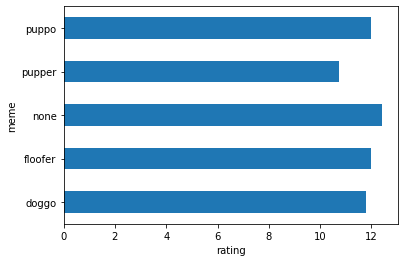

In [245]:
# I'll calculate the mean for each type of image
best_rating = df_master_clean.groupby('meme')['rating'].mean()
best_rating = best_rating.plot.barh(x='mean of rating')
best_rating.set_xlabel('rating')

### Insight
The best rating is the puppo image. The second one is Floofer and the thirds is Doogo. 

### Question
2.> What's is the dog name most popular in twitter?

Text(0, 0.5, 'count_of_names')

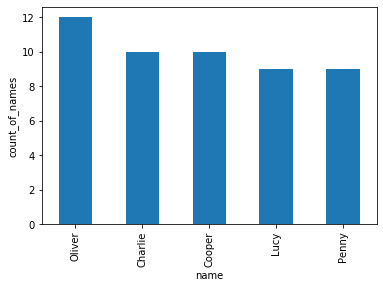

In [254]:
#I'll filter names different to None, and count the numbers of each name.

df= df_master_clean.loc[(df_master_clean['name'] != 'None')]                          
name_popular = df.groupby('name').size().nlargest(5)
name_popular
name_popular = name_popular.plot.bar(x='name')
name_popular.set_ylabel('count_of_names')


### Insight
The most popular name is Oliver. Other popular names are Charlie, Cooper, Lucy and Penny.

### Question
3.> In Wich month are there more Tweets?

Text(0, 0.5, 'count of tweets')

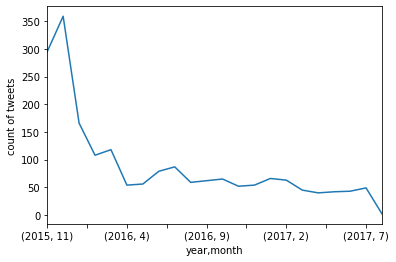

In [256]:
#I'll create plot to view max of tweets.
df_master_clean["month"] = df_master_clean['timestamp'].dt.month
df_master_clean["year"] = df_master_clean['timestamp'].dt.year
df=  df_master_clean.groupby(["year","month"])["tweet_id"].count()
df= df.plot()
df.set_ylabel('count of tweets')


### Insight
The maximum number of tweets was in december 2015. 